# IMPORTING LIBRARIES

In [1]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [2]:
import datetime

In [3]:
import torch
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM

In [4]:
import torch.nn as nn
import torch.optim as optim

In [5]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [6]:
pd.set_option("display.max_columns", None)

# 1. Load Data

In [7]:
traffic = pd.read_csv('traffic.csv', index_col=None,parse_dates=True)

In [8]:
traffic.head()

,Unnamed: 0,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
0,0,2018-01-01 00:00:00,1610011,1.0,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,00:00:00,1,0,0,2018
1,1,2018-01-01 01:00:00,1610011,1.0,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,01:00:00,1,1,0,2018
2,2,2018-01-01 02:00:00,1610011,1.0,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,02:00:00,1,2,0,2018
3,3,2018-01-01 03:00:00,1610011,1.0,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,03:00:00,1,3,0,2018
4,4,2018-01-01 04:00:00,1610011,1.0,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,04:00:00,1,4,0,2018


In [9]:
lincolnRd = traffic[traffic['siteRef'] == 1610013].copy()

# 2. Pre-processing 

In [10]:
traffic['startDatetime']=pd.to_datetime(traffic['startDatetime'])

traffic['date']=pd.to_datetime(traffic['date'])

traffic['time'] = pd.to_datetime(traffic['time'])

In [11]:
traffic= traffic.drop(['Unnamed: 0'],axis=1)

In [12]:
traffic.head()

,startDatetime,siteRef,direction,count,X,Y,OBJECTID,lane,type,percentHeavy,description,acceptedDays,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,siteType,date,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility,Cloud Cover,Sea Level Pressure,Conditions,Hol_type,day,time,month,hour,dayOfweek,year
0,2018-01-01 00:00:00,1610011,1.0,1221.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-20 00:00:00,1,0,0,2018
1,2018-01-01 01:00:00,1610011,1.0,1148.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-20 01:00:00,1,1,0,2018
2,2018-01-01 02:00:00,1610011,1.0,636.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-20 02:00:00,1,2,0,2018
3,2018-01-01 03:00:00,1610011,1.0,406.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-20 03:00:00,1,3,0,2018
4,2018-01-01 04:00:00,1610011,1.0,295.0,174.654029,-36.858365,6053,Inc,Continuous,8.4,SH16 Te Atatu Rd Interchange WB,365.0,37636.0,39823.0,40574.0,37891.0,39148.0,Regional Continuous,2018-01-01,2018-01-01,18.0,24.1,20.6,16.9,80.11,13.9,3.0,4.17,7.0,83.2,1010.8,"Rain, Overcast",PublicHoliday,1,2023-04-20 04:00:00,1,4,0,2018


# 3. Setting target and features

In [13]:
traffic = traffic.set_index('startDatetime')

In [14]:
target_column = 'count'
features = ['percentHeavy',
        'AADT5yearsAgo', 'AADT4yearsAgo', 'AADT3yearsAgo',
       'AADT2yearsAgo', 'AADT1yearAgo',
       'Temperature','Hol_type', 'day', 'month',
       'hour', 'dayOfweek', 'Conditions','lane']

In [15]:
X = traffic[features]
y= traffic[target_column]

X.index=y.index

In [16]:
len(X)

192720

# 4. DEALING WITH CATEGORICAL VARIABLES, AND SPLITTING

In [17]:
X = pd.get_dummies(X, columns=['lane', 'Hol_type', 'Conditions'], drop_first=True)

In [18]:
len(X)

192720

In [19]:
# Split the data into training and testing sets
train_size = 0.8  
train_index = int(len(X) * train_size)
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

In [20]:
#check test and train data
print(f'X_train:  {X_train.shape}')
print(f'y_train:  {y_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_test:  {y_test.shape}')

X_train:  (154176, 21)
y_train:  (154176,)
X_test:  (38544, 21)
y_test:  (38544,)


# 5. LINEAR REGRESSION

In [28]:
# Create a model for Linear Regression
lr = LinearRegression()

# Fit the model with the Training data
lr.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
trainingR2=lr.fit(X_train, y_train).score(X_train, y_train)

# Calculate the score (R^2 for Regression) for Testing Data
testR2=lr.fit(X_test, y_test).score(X_test, y_test)
linear_mape = mean_absolute_percentage_error(y_test,lr.predict(X_test))
lr_mae = mean_absolute_error(y_test, lr.predict(X_test))
lr_mse = mean_squared_error(y_test, lr.predict(X_test))

print("Training R^2:", trainingR2)
print("Testing R^2:", testR2)
print("MAE", lr_mae)
print("MSE", lr_mse)

Training R^2: 0.3913294850829977
Testing R^2: 0.3230647040036395
MAE 281.0015744595046
MSE 115980.1852586624


# 6. KNN REGRESSION

In [22]:
#Create and fit model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#make predictions
y_pred_knn = knn.predict(X_test)

#evaluate
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
knn_mape = mean_absolute_percentage_error(y_test,y_pred_knn)
knn_mae = mean_absolute_error(y_test,y_pred_knn)

print(f'Train score = {train_score:.3f}, Test score = {test_score:.3f}, Mean Squared error: = {mse:.3f},Mean absolute error: = {knn_mae:.3f},MAPE: = {knn_mape:.3f},"R2 score:", {r2:.3f}')


Train score = 0.973, Test score = 0.620, Mean Squared error: = 65139.847,Mean absolute error: = 180.109,MAPE: = 298590750726680.125,"R2 score:", 0.620


# 7. RIDGE CV

In [23]:
# Set up the range of alphas to try
alphas = [0.01, 0.1, 1, 10, 100]

# Set up a list to store the R2 scores
r2_scores = []

# Loop through each alpha and fit the model
for alpha in alphas:
    # Create and fit model with RidgeCV
    ridge = RidgeCV(alphas=[alpha], cv=5)
    ridge.fit(X_train, y_train)
    
    # Calculate R2 score for testing data
    r2_scores.append(ridge.score(X_test, y_test))

# Find the alpha with the highest R2 score
best_alpha = alphas[np.argmax(r2_scores)]

# Fit the model with the best alpha
ridge = RidgeCV(alphas=[best_alpha], cv=5)
ridge.fit(X_train, y_train)

# Calculate R2 score for training and testing data
train_r2 = ridge.score(X_train, y_train)
test_r2 = ridge.score(X_test, y_test)

# Print the results
print(f"Best alpha: {best_alpha}")
print(f"Training R2 score: {train_r2:.3f}")
print(f"Testing R2 score: {test_r2:.3f}")
print(f"Mean Squared Error: {mse:.4f}")

C:\Users\ruskin.dantra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.29454e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ruskin.dantra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.97771e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ruskin.dantra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.44544e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ruskin.dantra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.95214e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ruskin.dantra\anaconda3\lib\site-pa

Best alpha: 100
Training R2 score: 0.391
Testing R2 score: 0.128
Mean Squared Error: 65139.8467


# 8. RANDOM FOREST

In [24]:
# Instantiate a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the performance of the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
rf_mape = mean_absolute_percentage_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f'Train score = {train_score:.3f}, Test score = {test_score:.3f}, Mean Squared error: = {mse:.3f},Mean absolute error: = {rf_mae:.3f},MAPE: = {rf_mape:.3f},"R2 score:", {r2:.3f}')

Train score = 0.851, Test score = 0.601, Mean Squared error: = 68344.291,Mean absolute error: = 200.001,MAPE: = 226594227832380.250,"R2 score:", 0.601


# 9. DECISION TREE REGRESSION

In [25]:
# Instantiate a Random Forest regressor
dt = DecisionTreeRegressor(max_depth=5)


# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
y_pred_dt = dt.predict(X_test)

# Evaluate the performance of the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)
dt_mape = mean_absolute_percentage_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)

print(f'Train score = {train_score:.3f}, Test score = {test_score:.3f}, Mean Squared error: = {mse:.3f},Mean absolute error: = {dt_mae:.3f},MAPE: = {dt_mape:.3f},"R2 score:", {r2:.3f}')

Train score = 0.851, Test score = 0.601, Mean Squared error: = 67700.293,Mean absolute error: = 195.720,MAPE: = 213202422157059.656,"R2 score:", 0.605


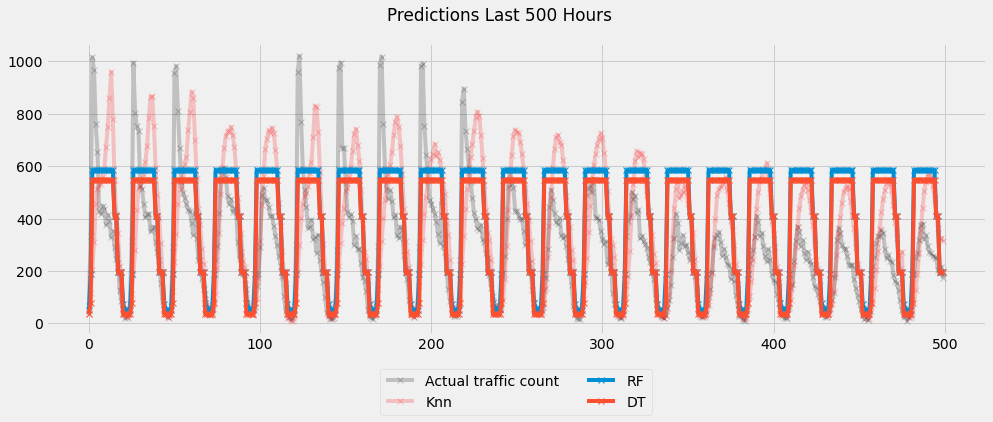

In [31]:
last_hours = slice(-500, None)
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle("Predictions Last 500 Hours")
ax.plot(
    y.values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual traffic count",
    color="black",
)
ax.plot(
   y_pred_knn[last_hours],
    "x-",
    alpha=0.2,
    label="Knn",
    color="red",
)
ax.plot(
    y_pred_rf[last_hours],
    "x-",
    label="RF",
)
ax.plot(
    y_pred_dt[last_hours],
    "x-",
    label="DT",
)

_ = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

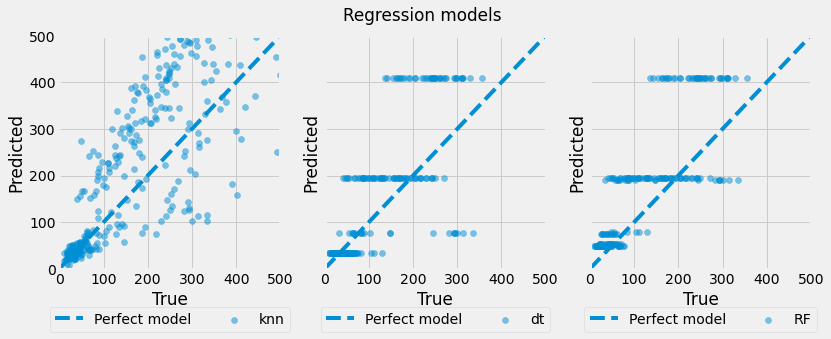

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Regression models")
predictions = [
    y_pred_knn,
    y_pred_dt, y_pred_rf]
labels = [
    "knn",
    "dt", "RF"
    ]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y_test.values[last_hours], pred[last_hours], alpha=0.5, label=label)
    ax.plot([0, 500], [0, 500], "--", label="Perfect model")
    ax.set(
        xlim=(0, 500),
        ylim=(0, 500),
        xlabel="True",
        ylabel="Predicted",
    )
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)


plt.show()